## Retrieve of Records from Excel File (No SQL included!)

***** Welcome to the World Life Expectancy Records *****
To view the records (from year 2006 to 2018), please enter the following: 
Period From (in year) <e.g. 2006>: 2006
Period To (in year) <e.g. 2009>: 2013

How many countries would you like to view from the records?: 7
Please enter the 7 countries name below: 
Country 1: United States
Country 2: Japan
Country 3: Singapore
Country 4: China
Country 5: Indonesia
Country 6: World
Country 7: Japan

Data Info for World Life Expectancy from 2006 to 2013: 
-------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2006 to 2013
Data columns (total 7 columns):
United States    8 non-null float64
Japan            8 non-null float64
Singapore        8 non-null float64
China            8 non-null float64
Indonesia        8 non-null float64
World            8 non-null float64
Japan            8 non-null float64
dtypes: float64(7)
memory usage: 512.0+ bytes
None




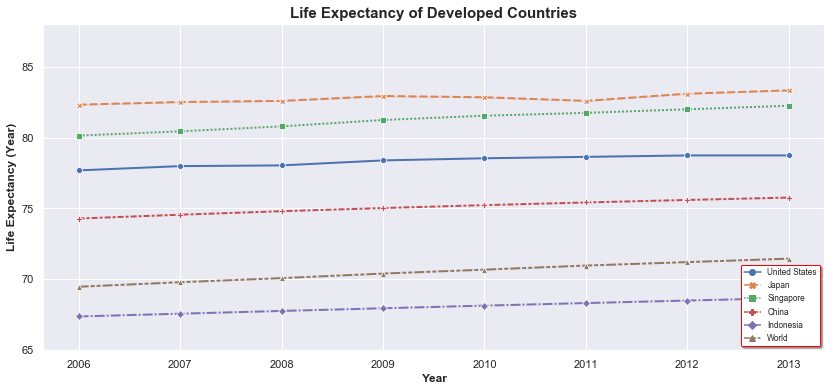

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def line_chart(life_exp):
    sns.set(style = "darkgrid", rc = {'figure.figsize' : (14,6)})
    ax = sns.lineplot(data = life_exp, markers = True, linewidth = 2)
    ax.set_title("Life Expectancy of Developed Countries", fontsize = 15, fontweight = "bold")
    ax.set_xlabel("Year", fontsize = 12, fontweight = "bold")
    ax.set_ylabel("Life Expectancy (Year)", fontsize = 12, fontweight = "bold")
    ax.set_ylim(65, 88)
    ax.legend(loc = "lower right", fontsize = "x-small", facecolor = "white", edgecolor = "red", shadow = 5)

    plt.show(ax)


filename = 'C:\\Users\Jeffrey Wong\SP_Assignment_2\Life Expectancy.xlsx'

data = pd.read_excel(filename, sep = ",", na_values = ['', '-', 'na', 'NA'], index_col = 'Country Name')
life_exp_df = pd.DataFrame(data)
life_exp_df = life_exp_df.fillna(value = 0)

print("***** Welcome to the World Life Expectancy Records *****")
print("================================================================================")
print("To view the records (from year 2006 to 2018), please enter the following: ")
period_from = input("Period From (in year) <e.g. 2006>: ")
period_to = input("Period To (in year) <e.g. 2009>: ")
print()

### extract the column data based on period from and period to 
life_exp = life_exp_df.loc[:, period_from:period_to]

### prompt the user enter the number of countries to view from the records
n = int(input("How many countries would you like to view from the records?: "))

### prompt the user to enter the countries name based on the number of countries to view 
print("Please enter the {} countries name below: ".format(n))
country_name = []
for i in range(n):
    country = input("Country {}: ".format(i+1))
    country_name.append(country)
    
### extract the row data based on the countries name
life_exp = life_exp.loc[country_name].transpose()

print()
print("Data Info for World Life Expectancy from {} to {}: ".format(period_from, period_to))
print("-------------------------------------------------------------------------------------")
print(life_exp.info())
print()

print()
print("Data for World Life Expectancy from {} to {}: ".format(period_from, period_to))
print("--------------------------------------------------------------------------")
print(life_exp)
print()

### to display the descriptive statistics summary
print("Basic Descriptive Statistics Summary for World Life Expectancy: ")
print("--------------------------------------------------------------------------")
print(life_exp.describe())
print()

### to create multiple line plot within the same figure
print("Graphical Summary for World Life Expectancy: ")
print("--------------------------------------------------------------------------")
print()

### call the function to display line chart
line_chart(life_exp)